In [2]:
## This is the conductor 


## Defining the initial hyperparameters


In [3]:
## Two mode optimizer
#function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)
import numpy as np
import matplotlib.pyplot as plt

def Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search):

# function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)


    Vectorized_Implimentation = 0
    For_Loop_Implimentation = 1
    TargetedSearch = np.zeros((len(InitialParameters),NumberOfSamples))
    if sum(abs(Parameter_ChangeVector)) > SignificantChangeValue:
        ImprovementItteration = 1


    if Vectorized_Implimentation == 1:
        TargetedSearch = exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)*diag(TargetedMultiplicationFactor*(-Cost_Change)*Parameter_ChangeVector)*ones(length(InitialParameters),NumberOfSamples)*diag(rand(NumberOfSamples,1))
        RandomSearch = exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor*(rand(length(InitialParameters),NumberOfSamples)-0.5)


    if For_Loop_Implimentation == 1:
        RandomNumbers = np.random.rand(NumberOfSamples,1)
        
        TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate) \
        *TargetedMultiplicationFactor*(-Cost_Change)

        for sample in range (1,NumberOfSamples):

            TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

        
        RandomSearch = min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search) \
        *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)
        
    
        if min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search) == Maximal_Random_Search:
            RandomSearch = np.sin((ImprovementItteration-1)*2*RandomSearchGrowthRate + np.pi/2)*0.1 \
            *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)

#     print(RandomSearch)
    Suggested_Parameter_Samples_From_Two_Mode = InitialParameters + TargetedSearch + RandomSearch
    Suggested_Parameter_Samples_From_Two_Mode[:,1] = InitialParameters[:,0]

    ImprovementItteration = ImprovementItteration +1;


    return Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration


TestTwo_Mode = 1
if TestTwo_Mode == 1:
    ## Two mode test
    InitialParameters = np.random.rand(20,1)
    x = np.array([np.linspace(0,4,20)]).T
    y = x**2


    NumberOfSamples = 10
    ## Setting the hyperparameters for two mode
    ImprovementItteration = 1
    TargetedSearchDecayRate = 1
    RandomSearchGrowthRate = 0.1
    TargetedMultiplicationFactor = 100
    RandomMultiplicationFactor = 100
    SignificantChangeValue = 0.2
    Maximal_Random_Search = 0.5

    Parameter_ChangeVector = np.zeros((len(InitialParameters),1))
    Cost_Change = 0

    PreviousCost = np.sum((InitialParameters-y)**2)
    Best_Individual = InitialParameters

    for i in range(0,100):
        Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration = Two_Mode_Optimizer(Best_Individual,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search)

        Cost = np.sum((Suggested_Parameter_Samples_From_Two_Mode-y)**2,0)

        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]

        Cost_Change = CurrentCost - PreviousCost
        Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T - Best_Individual
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T

        PreviousCost = CurrentCost
        print(CurrentCost)







985.3620736123678
886.3353529707036
886.3353529707036
885.4078748243636
869.9598021726138
869.9598021726138
867.2303482192284
761.0270403830286
757.5109627177432
598.8103550500898
598.6296746818489
597.1433931721859
595.1911091092669
595.1911091092669
593.4673607268145
542.9098368337525
542.7700114211844
540.8161467456626
540.2349224193414
534.9922782269911
534.9922782269911
532.8120433934575
479.2216147321629
479.2216147321629
475.9315307070925
338.9179371426256
337.7595366283796
318.91469447388675
318.6421891944559
315.57453357780116
314.9441001665227
314.9441001665227
313.0668012482804
239.44157026665937
239.31305721839274
238.17573683162692
238.17573683162692
235.97217463662344
179.24258361714993
179.24258361714993
177.87300760425083
151.48771785349138
150.6354041873486
138.9931225951475
137.56357466061706
110.5919198228268
110.5919198228268
108.97214602951328
77.76945447761426
77.74494886693414
77.17231687176964
76.32055015627633
76.32055015627633
75.57852079815854
69.444261897996

In [4]:
import numpy as np


def Pinball_Optimizer(Initial_Parameters,NumberOfSamples,Search_Ratio,AmplitudeOfLinearSearch,AmplitudeOfRandomSearch,Linear_Search_Vector):


    ##Initalize infunction arrays
    Suggested_Parameter_Samples_From_Pinball = np.zeros((len(Initial_Parameters),NumberOfSamples))

    Number_Of_Linear_Samples = int(Search_Ratio*NumberOfSamples)

    Step_Size_Vector = np.linspace(-AmplitudeOfLinearSearch/2,AmplitudeOfLinearSearch/2,Number_Of_Linear_Samples)

    I = np.argmin(np.abs(Step_Size_Vector))
    Step_Size_Vector[I] = 0

    for k in range (0,NumberOfSamples):
        if k +1<=Number_Of_Linear_Samples:
                ## Generate Linear Search Samples around the inital parameter vector
            Suggested_Parameter_Samples_From_Pinball[:,k] = Initial_Parameters[:,0] + Linear_Search_Vector[:,0]*Step_Size_Vector[k]                     

        else:
                ## Generate Random Search Samples around the inital parameter vector  
            Suggested_Parameter_Samples_From_Pinball[:,k] = Initial_Parameters[:,0] + 2*AmplitudeOfRandomSearch*(np.random.rand(1,len(Initial_Parameters))-0.5)

    return Suggested_Parameter_Samples_From_Pinball







Test_Pinball = 0
if Test_Pinball == 1:


    ## Pinball HyperParameters
    NumberOfSamples = 10
    Search_Ratio = 0.7;
    AmplitudeOfLinearSearch = 0.5;
    AmplitudeOfRandomSearch = 0.5;
    Linear_Search_Vector = np.random.rand(len(Initial_Parameters),1)-0.5;
    Number_Of_Linear_Samples = int(Search_Ratio*NumberOfSamples)


    ## Testing Pinball

    Initial_Parameters = np.random.rand(20,1)
    Best_Individual = Initial_Parameters
    x = np.array([np.linspace(0,4,20)]).T
    y = x**2

    for i in range(0,50):
        Suggested_Parameter_Samples_From_Pinball = Pinball_Optimizer(Best_Individual,NumberOfSamples,Search_Ratio,AmplitudeOfLinearSearch,AmplitudeOfRandomSearch,Linear_Search_Vector)

        Cost = np.sum((Suggested_Parameter_Samples_From_Pinball-y)**2,0)

        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]

        Cost_Change = CurrentCost - PreviousCost
        Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Pinball[:,index_min]]).T - Best_Individual
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Pinball[:,index_min]]).T



        if index_min > Number_Of_Linear_Samples:                                ## If the best vector was from the random batch
            Linear_Search_Vector = Parameter_ChangeVector                       ## Take a vector that follows the gradient
        else:                                                                   ## If no better vector is found
            Linear_Search_Vector = np.random.rand(len(Initial_Parameters),1)-0.5        ## Take a random vector

        print(CurrentCost)


In [5]:
## Guessing game part 1
import numpy as np
def Guessing_Game_Optimizer_Part1(Initial_Parameters,NumberRandomVectors,dt):

    RandomVectors = np.random.rand(len(Initial_Parameters),NumberRandomVectors)-0.5
    LengthOfVectors = np.zeros((NumberRandomVectors,1))
    Suggested_Parameter_Samples_From_Guessing_Game = np.zeros((len(Initial_Parameters),3*NumberRandomVectors))
    Suggested_Parameter_Samples_From_Guessing_Game[:,1] = Initial_Parameters[:,0]
    
    for vector in range (0,NumberRandomVectors):
        LengthOfVectors[vector] = np.sqrt(np.dot(RandomVectors[:,vector],RandomVectors[:,vector]))
        Suggested_Parameter_Samples_From_Guessing_Game[:,2 + 2*(vector-1)] = Initial_Parameters[:,0] - dt*RandomVectors[:,vector]
        Suggested_Parameter_Samples_From_Guessing_Game[:,3 + 2*(vector-1)] = Initial_Parameters[:,0] + dt*RandomVectors[:,vector]

    return Suggested_Parameter_Samples_From_Guessing_Game,LengthOfVectors,RandomVectors 




def Guessing_Game_Optimizer_Part2(Initial_Parameters,NumberRandomVectors,CostVector,dt,RandomVectors,LengthOfVectors,NumberOfSamples_For_Round2,NumberOfSamples_For_AverageVector,AmplitudeOf_SingleVectors, AmplitudeOf_EvenVectors,AmplitudeOf_RandomVectors):

    Gradient = np.zeros((NumberRandomVectors,1))
    Hessian = np.zeros((NumberRandomVectors,1))
    Suggested_Parameter_Samples_From_Guessing_Game = np.zeros((len(Initial_Parameters),NumberOfSamples_For_Round2))

    for vector in range (0,NumberRandomVectors):
        ## Calculate Gradients
        Gradient[vector] = (CostVector[3 + 2*(vector-1)] - CostVector[2 + 2*(vector-1)])/(LengthOfVectors[vector]*dt)
        ## Calculate Diagonal Hessian
        Hessian[vector] = (2*CostVector[1] - CostVector[3 + 2*(vector-1)] - CostVector[2 + 2*(vector-1)])/((LengthOfVectors[vector]*dt)**2)
    



    ResizedVectorArray = (RandomVectors*(np.diag((Hessian>0)*Gradient/Hessian - (Hessian<0)*Gradient/Hessian)))


    for sample in range (0,NumberOfSamples_For_Round2):
        vector = sample
        if sample < NumberRandomVectors:
            

            Suggested_Parameter_Samples_From_Guessing_Game[:,sample] = Initial_Parameters[:,0] - \
            AmplitudeOf_SingleVectors*ResizedVectorArray[:,vector]
        
        if sample > NumberRandomVectors and sample <= NumberRandomVectors + NumberOfSamples_For_AverageVector:
            
            Suggested_Parameter_Samples_From_Guessing_Game[:,sample] = Initial_Parameters[:,0] - \
            AmplitudeOf_EvenVectors*np.random.rand(1,1)*np.sum(ResizedVectorArray)
        
        if sample > NumberRandomVectors + NumberOfSamples_For_AverageVector:
            
            Suggested_Parameter_Samples_From_Guessing_Game[:,sample] = Initial_Parameters[:,0] -  \
            AmplitudeOf_RandomVectors*np.sum(np.diag(np.random.rand(NumberRandomVectors,1))*ResizedVectorArray)
        
    

    return Suggested_Parameter_Samples_From_Guessing_Game





Test_Guessing_Game = 1
if Test_Guessing_Game == 1:

    ## Guessing Game HyperParameters
    dt = 0.01;
    NumberRandomVectors = 4;
    NumberOfSamples_For_AverageVector = 2;
    AmplitudeOf_SingleVectors = 200;
    AmplitudeOf_EvenVectors = 200;
    AmplitudeOf_RandomVectors = 200;

    ## Testin Guessing game
    NumberOfSamples = 20
    Initial_Parameters = np.random.rand(30,1)
    Best_Individual = Initial_Parameters
    x = np.array([np.linspace(0,4,30)]).T
    y = x**2



    for i in range (0,40):
        Suggested_Parameter_Samples_From_Guessing_Game1,LengthOfVectors,RandomVectors = Guessing_Game_Optimizer_Part1(Best_Individual,NumberRandomVectors,dt)

        NumberOfSamples_For_Round2 = NumberOfSamples - len(Suggested_Parameter_Samples_From_Guessing_Game1[1,:])

        CostVector = np.sum((Suggested_Parameter_Samples_From_Guessing_Game1-y)**2,0)
        Suggested_Parameter_Samples_From_Guessing_Game2 = Guessing_Game_Optimizer_Part2(Best_Individual,NumberRandomVectors,CostVector,dt,RandomVectors,LengthOfVectors,NumberOfSamples_For_Round2,NumberOfSamples_For_AverageVector,AmplitudeOf_SingleVectors, AmplitudeOf_EvenVectors,AmplitudeOf_RandomVectors)

        Cost = np.sum((Suggested_Parameter_Samples_From_Guessing_Game2-y)**2,0)
        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]
        print(CurrentCost)
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Guessing_Game2[:,index_min]]).T

827.4245659413507
751.3341684232971
747.4345354573451
692.6205263918507
690.6444987630546
638.4581514294946
574.6956649580654
594.5331119432998
572.9273370791831
565.9792355419398
543.3208650054573
544.5757487614404
542.4457832363248
533.977551237253
499.17224881734046
459.9634627573771
447.41103776243864
414.7215692277663
397.00163110219927
410.446288572451
407.88540839183827
391.54612920183064
341.25149263266536
315.6885955865191
290.90332311063617
293.7140202937454
208.0652159033993
176.5993249881378
181.3341524885654
192.38301298442383
191.27363630103187
191.79578685852152
192.15986315700172
189.02874225233634
197.58431507993745
201.2401935525995
205.59349698329083
199.86183720260075
222.21739563301338
205.0971922357187


In [6]:
## Conductor Algorithm
import numpy as np

def Resource_Allocation_Hamiltonian(Initial_Resource_Allocation,Current_Resource_Allocation,Changevector,MassVector,Self_Interaction_Spring_Constants,Neighboring_Algorithm_Interaction_Spring_Constants,Epsilon1):
    Norm = np.sqrt(np.matmul(Changevector,Changevector))
    if Norm != 0:
        Changevector = Changevector/Norm
    
    R0 = Initial_Resource_Allocation
    R = Current_Resource_Allocation
    K0 = Self_Interaction_Spring_Constants
    K = Neighboring_Algorithm_Interaction_Spring_Constants #K(1) = K12, K(2) = K23, K(3) = K31%

    Epsilon = Epsilon1



    InteractionMatrix = np.array([[K[0]+K[2], -K[0], -K[1]], [ -K[0], K[0]+K[1] ,-K[1]], [-K[2], -K[1], K[1]+K[2]]])

    ##This system is equivilent to 3 springs connected in a ring with interactions between them, 
    ## and a self sping connected to the tabel that tries to return them to equilibrium


    for n in range (0,1):
        H_Self = -(K0/MassVector)*(R-R0)
        H_Interaction = np.matmul(InteractionMatrix,(Changevector/MassVector).T)
        H_tot = H_Self + H_Interaction.T

        R = R + H_tot

        
        if np.mean(H_tot/R)<Epsilon:
            break
    

    

    RecomendedResourceAllocation = np.round(R,0)


    return RecomendedResourceAllocation

### Test of the conductor algorithm

## Resource Distribution Algorithm - HyperParameters
Initial_Resource_Allocation = np.array([60 ,60 ,60])
Current_Resource_Allocation =Initial_Resource_Allocation
Best_Change_In_CostFunction_FromAlgorithm = np.array([0 ,0 ,0])
MassVector = 10*np.array([1, 1, 1])
Self_Interaction_Spring_Constants = 5*np.array([1, 1, 1])
Neighboring_Algorithm_Interaction_Spring_Constants = 90*np.array([1, 1, 1])
Epsilon1 = 0.01

for i in range (1,20):
    Changevector = np.array([-1, 0 ,0])
    RecomendedResourceAllocation = Resource_Allocation_Hamiltonian(Initial_Resource_Allocation,Current_Resource_Allocation,Changevector,MassVector,Self_Interaction_Spring_Constants,Neighboring_Algorithm_Interaction_Spring_Constants,Epsilon1)
    Current_Resource_Allocation = RecomendedResourceAllocation

Minimal_Allocation = np.min(Current_Resource_Allocation)
print("Minimal_Allocation is:",Minimal_Allocation)
for i in range (1,20):
    Changevector = np.array([1,0 ,0])
    RecomendedResourceAllocation = Resource_Allocation_Hamiltonian(Initial_Resource_Allocation,Current_Resource_Allocation,Changevector,MassVector,Self_Interaction_Spring_Constants,Neighboring_Algorithm_Interaction_Spring_Constants,Epsilon1)
    Current_Resource_Allocation = RecomendedResourceAllocation

Maximal_Allocation = np.max(Current_Resource_Allocation)
print("Maximal_Allocation is:",Maximal_Allocation)

Minimal_Allocation is: 24.0
Maximal_Allocation is: 96.0


In [ ]:
print(1)

In [367]:
## List of remaining tasks
# make the make a dynamic hyperparameter algorithm
# combine the pieces into a full orchestra algorithm
# test on mnist convnet classifier

3.8476116097929145
3.7837846737621916
3.7490015981162856
3.7069719617333505
3.4639572241615153
3.367340170313941
3.240737260632697
3.1651800801004697
2.65540692994257
2.633521939988312
2.4279199508649154
2.352910779086372
2.155009580713262
2.149784442187616
2.120521442811539
2.0789771714899046
2.0788787571825282
2.037355380867781
1.9110821897379149
1.5570486920698159


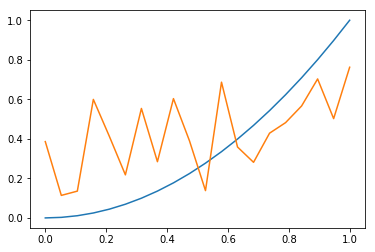

In [9]:
## Using pinball algorithm

import numpy as np
import matplotlib.pyplot as plt

def Pinball_Optimizer(Initial_Parameters,NumberOfSamples,Search_Ratio,AmplitudeOfLinearSearch,AmplitudeOfRandomSearch,Linear_Search_Vector):


    ##Initalize infunction arrays
    Suggested_Parameter_Samples_From_Pinball = np.zeros((len(Initial_Parameters),NumberOfSamples))

    Number_Of_Linear_Samples = int(Search_Ratio*NumberOfSamples)

    Step_Size_Vector = np.linspace(-AmplitudeOfLinearSearch/2,AmplitudeOfLinearSearch/2,Number_Of_Linear_Samples)

    I = np.argmin(np.abs(Step_Size_Vector))
    Step_Size_Vector[I] = 0

    for k in range (0,NumberOfSamples):
        if k +1<=Number_Of_Linear_Samples:
                ## Generate Linear Search Samples around the inital parameter vector
            Suggested_Parameter_Samples_From_Pinball[:,k] = Initial_Parameters[:,0] + Linear_Search_Vector[:,0]*Step_Size_Vector[k]                     

        else:
                ## Generate Random Search Samples around the inital parameter vector  
            Suggested_Parameter_Samples_From_Pinball[:,k] = Initial_Parameters[:,0] + 2*AmplitudeOfRandomSearch*(np.random.rand(1,len(Initial_Parameters))-0.5)

    return Suggested_Parameter_Samples_From_Pinball






def Optimize_With_Pinball_Algorithm(x,y,Initial_Parameters,Cost1,Number_Of_Itterations,print_Cost,NumberOfSamples,Search_Ratio,AmplitudeOfLinearSearch,AmplitudeOfRandomSearch):


    ## Testing Pinball

#     Initial_Parameters = np.random.rand(20,1)
    Best_Individual = Initial_Parameters
    Linear_Search_Vector = np.random.rand(len(Initial_Parameters),1)-0.5;
    Number_Of_Linear_Samples = int(Search_Ratio*NumberOfSamples)
#     x = np.array([np.linspace(0,4,20)]).T
#     y = x**2

    for i in range(0,Number_Of_Itterations):
        Suggested_Parameter_Samples_From_Pinball = Pinball_Optimizer(Best_Individual,NumberOfSamples,Search_Ratio,AmplitudeOfLinearSearch,AmplitudeOfRandomSearch,Linear_Search_Vector)

#         Cost = np.sum((Suggested_Parameter_Samples_From_Pinball-y)**2,0)
        Cost = Cost1.Cost_Function(y,Suggested_Parameter_Samples_From_Pinball)
        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]

        Cost_Change = CurrentCost - PreviousCost
        Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Pinball[:,index_min]]).T - Best_Individual
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Pinball[:,index_min]]).T



        if index_min > Number_Of_Linear_Samples:                                ## If the best vector was from the random batch
            Linear_Search_Vector = Parameter_ChangeVector                       ## Take a vector that follows the gradient
        else:                                                                   ## If no better vector is found
            Linear_Search_Vector = np.random.rand(len(Initial_Parameters),1)-0.5        ## Take a random vector
        
        if print_Cost == 1:
            print(CurrentCost)
    return Best_Individual, CurrentCost
        
        
        
        
## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Y,Individuals): 
        
        ## This should be a cost function to be minimized
        ## This should output the cost / negative fittness - for each of the individuals

        Cost_Function1 = np.sum((Y - Individuals)**2,0)

        return Cost_Function1
    
## Defining Pinball HyperParameters
NumberOfSamples = 10
Search_Ratio = 0.7;
AmplitudeOfLinearSearch = 0.1;
AmplitudeOfRandomSearch = 0.1;
print_Cost = 1

Number_Of_Itterations = 20
Initial_Parameters = np.random.rand(20,1)

x = np.array([np.linspace(0,1,20)]).T
Y = x**2
Cost1 = Cost_Function()


Best_Individual, CurrentCost = Optimize_With_Pinball_Algorithm(x,Y,Initial_Parameters,Cost1,Number_Of_Itterations,print_Cost,NumberOfSamples,Search_Ratio,AmplitudeOfLinearSearch,AmplitudeOfRandomSearch)


plt.plot(x,Y)
plt.plot(x,Best_Individual)

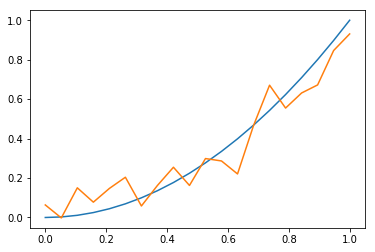

In [486]:
## Using Guessing Game algorithm


## Guessing game part 1
import numpy as np
def Guessing_Game_Optimizer_Part1(Initial_Parameters,NumberRandomVectors,dt):

    RandomVectors = np.random.rand(len(Initial_Parameters),NumberRandomVectors)-0.5
    LengthOfVectors = np.zeros((NumberRandomVectors,1))
    Suggested_Parameter_Samples_From_Guessing_Game = np.zeros((len(Initial_Parameters),3*NumberRandomVectors))
    Suggested_Parameter_Samples_From_Guessing_Game[:,1] = Initial_Parameters[:,0]
    
    for vector in range (0,NumberRandomVectors):
        LengthOfVectors[vector] = np.sqrt(np.dot(RandomVectors[:,vector],RandomVectors[:,vector]))
        Suggested_Parameter_Samples_From_Guessing_Game[:,2 + 2*(vector-1)] = Initial_Parameters[:,0] - dt*RandomVectors[:,vector]
        Suggested_Parameter_Samples_From_Guessing_Game[:,3 + 2*(vector-1)] = Initial_Parameters[:,0] + dt*RandomVectors[:,vector]

    return Suggested_Parameter_Samples_From_Guessing_Game,LengthOfVectors,RandomVectors 




def Guessing_Game_Optimizer_Part2(Initial_Parameters,NumberRandomVectors,CostVector,dt,RandomVectors,LengthOfVectors,NumberOfSamples_For_Round2,NumberOfSamples_For_AverageVector,AmplitudeOf_SingleVectors, AmplitudeOf_EvenVectors,AmplitudeOf_RandomVectors):

    Gradient = np.zeros((NumberRandomVectors,1))
    Hessian = np.zeros((NumberRandomVectors,1))
    Suggested_Parameter_Samples_From_Guessing_Game = np.zeros((len(Initial_Parameters),NumberOfSamples_For_Round2))

    for vector in range (0,NumberRandomVectors):
        ## Calculate Gradients
        Gradient[vector] = (CostVector[3 + 2*(vector-1)] - CostVector[2 + 2*(vector-1)])/(LengthOfVectors[vector]*dt)
        ## Calculate Diagonal Hessian
        Hessian[vector] = (2*CostVector[1] - CostVector[3 + 2*(vector-1)] - CostVector[2 + 2*(vector-1)])/((LengthOfVectors[vector]*dt)**2)
    



    ResizedVectorArray = (RandomVectors*(np.diag((Hessian>0)*Gradient/Hessian - (Hessian<0)*Gradient/Hessian)))


    for sample in range (0,NumberOfSamples_For_Round2):
        vector = sample
        if sample < NumberRandomVectors:
            

            Suggested_Parameter_Samples_From_Guessing_Game[:,sample] = Initial_Parameters[:,0] - \
            AmplitudeOf_SingleVectors*ResizedVectorArray[:,vector]
        
        if sample > NumberRandomVectors and sample <= NumberRandomVectors + NumberOfSamples_For_AverageVector:
            
            Suggested_Parameter_Samples_From_Guessing_Game[:,sample] = Initial_Parameters[:,0] - \
            AmplitudeOf_EvenVectors*np.random.rand(1,1)*np.sum(ResizedVectorArray)
        
        if sample > NumberRandomVectors + NumberOfSamples_For_AverageVector:
            
            Suggested_Parameter_Samples_From_Guessing_Game[:,sample] = Initial_Parameters[:,0] -  \
            AmplitudeOf_RandomVectors*np.sum(np.diag(np.random.rand(NumberRandomVectors,1))*ResizedVectorArray)
        
    

    return Suggested_Parameter_Samples_From_Guessing_Game



def Optimize_With_Guessing_Game_Algorithm(x,y,Initial_Parameters,Cost1,dt,NumberRandomVectors,NumberOfSamples_For_AverageVector,AmplitudeOf_SingleVectors,AmplitudeOf_EvenVectors,AmplitudeOf_RandomVectors,NumberOfSamples,print_Cost):

    Best_Individual = Initial_Parameters
    for i in range (0,40):
        Suggested_Parameter_Samples_From_Guessing_Game1,LengthOfVectors,RandomVectors = Guessing_Game_Optimizer_Part1(Best_Individual,NumberRandomVectors,dt)

        NumberOfSamples_For_Round2 = NumberOfSamples - len(Suggested_Parameter_Samples_From_Guessing_Game1[1,:])

        CostVector = Cost1.Cost_Function(y,Suggested_Parameter_Samples_From_Guessing_Game1)
#         CostVector = np.sum((Suggested_Parameter_Samples_From_Guessing_Game1-y)**2,0)
        Suggested_Parameter_Samples_From_Guessing_Game2 = Guessing_Game_Optimizer_Part2(Best_Individual,NumberRandomVectors,CostVector,dt,RandomVectors,LengthOfVectors,NumberOfSamples_For_Round2,NumberOfSamples_For_AverageVector,AmplitudeOf_SingleVectors, AmplitudeOf_EvenVectors,AmplitudeOf_RandomVectors)

        Cost = Cost1.Cost_Function(y,Suggested_Parameter_Samples_From_Guessing_Game2)
#         Cost = np.sum((Suggested_Parameter_Samples_From_Guessing_Game2-y)**2,0)
        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]
        if print_Cost == 1:
            print(CurrentCost)
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Guessing_Game2[:,index_min]]).T
        
    return Best_Individual
 
    
    
    
## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Y,Individuals): 
        
        ## This should be a cost function to be minimized
        ## This should output the cost / negative fittness - for each of the individuals

        Cost_Function1 = np.sum((Y - Individuals)**2,0)

        return Cost_Function1
    
    
## Guessing Game HyperParameters
dt = 0.01;
NumberRandomVectors = 4;
NumberOfSamples_For_AverageVector = 2;
AmplitudeOf_SingleVectors = 10;
AmplitudeOf_EvenVectors = 10;
AmplitudeOf_RandomVectors = 10;

## Testin Guessing game
NumberOfSamples = 20
Initial_Parameters = np.random.rand(20,1)
Number_Of_Itterations = 3
print_Cost = 0

x = np.array([np.linspace(0,1,20)]).T
y = x**2
Cost1 = Cost_Function()

Best_Individual = Optimize_With_Guessing_Game_Algorithm(x,y,Initial_Parameters,Cost1,dt,NumberRandomVectors,NumberOfSamples_For_AverageVector,AmplitudeOf_SingleVectors,AmplitudeOf_EvenVectors,AmplitudeOf_RandomVectors,NumberOfSamples,print_Cost)


plt.plot(x,Y)
plt.plot(x,Best_Individual)

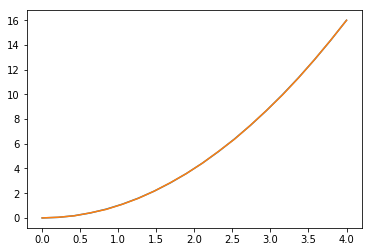

In [492]:
## Using Two mode algorithm


## Two mode optimizer
#function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)
import numpy as np
import matplotlib.pyplot as plt

def Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search):

# function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)


    Vectorized_Implimentation = 0
    For_Loop_Implimentation = 1
    TargetedSearch = np.zeros((len(InitialParameters),NumberOfSamples))
    if sum(abs(Parameter_ChangeVector)) > SignificantChangeValue:
        ImprovementItteration = 1


    if Vectorized_Implimentation == 1:
        TargetedSearch = exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)*diag(TargetedMultiplicationFactor*(-Cost_Change)*Parameter_ChangeVector)*ones(length(InitialParameters),NumberOfSamples)*diag(rand(NumberOfSamples,1))
        RandomSearch = exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor*(rand(length(InitialParameters),NumberOfSamples)-0.5)


    if For_Loop_Implimentation == 1:
        RandomNumbers = np.random.rand(NumberOfSamples,1)
        
        TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate) \
        *TargetedMultiplicationFactor*(-Cost_Change)

        for sample in range (1,NumberOfSamples):

            TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

        
        RandomSearch = min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search) \
        *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)
        
    
        if min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search) == Maximal_Random_Search:
            RandomSearch = np.sin((ImprovementItteration-1)*2*RandomSearchGrowthRate + np.pi/2)*0.1 \
            *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)

#     print(RandomSearch)
    Suggested_Parameter_Samples_From_Two_Mode = InitialParameters + TargetedSearch + RandomSearch
    Suggested_Parameter_Samples_From_Two_Mode[:,1] = InitialParameters[:,0]

    ImprovementItteration = ImprovementItteration +1;


    return Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration




def Optimize_With_Two_Mode_Algorithm(x,y,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations):
    
    Parameter_ChangeVector = np.zeros((len(InitialParameters),1))
    Cost_Change = 0
    
    PreviousCost = Cost1.Cost_Function(y,InitialParameters)
#     PreviousCost = np.sum((InitialParameters-y)**2)
    Best_Individual = InitialParameters

    for i in range(0,Number_Of_Itterations):
        Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration = Two_Mode_Optimizer(Best_Individual,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search)

#         Cost = np.sum((Suggested_Parameter_Samples_From_Two_Mode-y)**2,0)
        Cost    = Cost1.Cost_Function(y,Suggested_Parameter_Samples_From_Two_Mode)
        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]

        Cost_Change = CurrentCost - PreviousCost
        Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T - Best_Individual
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T

        PreviousCost = CurrentCost
        if print_Cost == 1:
            print(CurrentCost)
    
    return Best_Individual



## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Y,Individuals): 
        
        ## This should be a cost function to be minimized
        ## This should output the cost / negative fittness - for each of the individuals

        Cost_Function1 = np.sum((Y - Individuals)**2,0)

        return Cost_Function1
    
    
    



## Setting the hyperparameters for two mode
NumberOfSamples = 10
ImprovementItteration = 1
TargetedSearchDecayRate = 1
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 100
RandomMultiplicationFactor = 100
SignificantChangeValue = 0.2
Maximal_Random_Search = 0.5


    ## Two mode test
InitialParameters = np.random.rand(20,1)
x = np.array([np.linspace(0,4,20)]).T
y = x**2
Cost1 = Cost_Function()
Number_Of_Itterations = 300
print_Cost = 0

Best_Individual = Optimize_With_Two_Mode_Algorithm(x,y,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)

plt.plot(x,y)
plt.plot(x,Best_Individual)